In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import missingno as msno
import datetime

In [90]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [91]:
df=pd.read_csv(r'C:\Users\Sukanya Sahoo\Downloads\transaction_data.csv')

In [92]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1083818 non-null int64
TransactionId             1083818 non-null int64
TransactionTime           1083818 non-null object
ItemCode                  1083818 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1083818 non-null int64
CostPerItem               1083818 non-null float64
Country                   1083818 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [94]:
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [95]:
df[df.isnull().any(axis=1)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom


In [96]:
df['TransactionTime']=pd.to_datetime(df['TransactionTime'])

In [97]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [98]:
df['TransactionTime'] = pd.to_datetime(df.TransactionTime, format='%m-%d-%Y %H:%M:%S')
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [99]:
data=df.dropna()

In [100]:
data.isnull().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080910 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1080910 non-null int64
TransactionId             1080910 non-null int64
TransactionTime           1080910 non-null datetime64[ns]
ItemCode                  1080910 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1080910 non-null int64
CostPerItem               1080910 non-null float64
Country                   1080910 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 74.2+ MB


In [102]:
data.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1080910.00,1080910.00,1080910.00,1080910.00,1080910.00
mean,241664.63,6159571.48,657520.10,28.81,9.52
std,141976.99,147664.00,451904.45,654.02,2311.24
min,-1.00,5900015.00,-1.00,-242985.00,-15265.64
25%,259707.00,6026878.00,460929.00,3.00,1.73
50%,302190.00,6167150.00,475293.00,9.00,2.88
75%,341481.00,6290064.00,488922.00,30.00,5.70
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


In [103]:
data=data[data.NumberOfItemsPurchased > 0]

In [104]:
data=data[data.UserId > 0]

In [105]:
data=data[data.ItemCode > 0]

In [106]:
data=data[data.CostPerItem > 0]

In [107]:
data.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,792940.00,792940.00,792940.00,792940.00,792940.00
mean,321330.41,6166807.66,645816.46,39.03,8.26
std,35905.21,144167.98,432828.78,538.83,2693.97
min,259266.00,5900015.00,42.00,3.00,0.06
25%,293475.00,6041585.00,462567.00,6.00,1.73
50%,318339.00,6180823.00,475986.00,18.00,2.70
75%,352821.00,6293001.00,488670.00,36.00,5.18
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


In [108]:
data['Total_amount']=data['NumberOfItemsPurchased']*data['CostPerItem']

In [109]:
data=data[['UserId','TransactionId','TransactionTime','ItemCode','ItemDescription','NumberOfItemsPurchased','CostPerItem','Total_amount','Country']]

In [110]:
data.insert(loc=3, column='year_month', value=data['TransactionTime'].map(lambda x: 100*x.year + x.month))
data.insert(loc=4, column='month', value=data.TransactionTime.dt.month)
data.insert(loc=5, column='day', value=(data.TransactionTime.dt.dayofweek)+1)
data.insert(loc=6, column='hour', value=data.TransactionTime.dt.hour)

In [111]:
data.head()

,UserId,TransactionId,TransactionTime,year_month,month,day,hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Total_amount,Country
0,278166,6355745,2019-02-02 12:50:00,201902,2,6,12,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,201812,12,3,9,482370,LONDON BUS COFFEE MUG,3,3.52,10.56,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,201902,2,5,9,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,64.80,France
3,380478,6044973,2018-06-22 07:14:00,201806,6,5,7,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,201901,1,5,9,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,42.24,United Kingdom


In [112]:
data['ItemDescription']=data.ItemDescription.str.lower()
data.head()

,UserId,TransactionId,TransactionTime,year_month,month,day,hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Total_amount,Country
0,278166,6355745,2019-02-02 12:50:00,201902,2,6,12,465549,family album white picture frame,6,11.73,70.38,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,201812,12,3,9,482370,london bus coffee mug,3,3.52,10.56,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,201902,2,5,9,490728,set 12 colour pencils dolly girl,72,0.90,64.80,France
3,380478,6044973,2018-06-22 07:14:00,201806,6,5,7,459186,union jack flag luggage tag,3,1.73,5.19,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,201901,1,5,9,1787247,cut glass t-light holder octagon,12,3.52,42.24,United Kingdom


In [114]:
data.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count().head()

,UserId,Country,TransactionId
0,259266,United Kingdom,2
1,259287,Iceland,364
2,259308,Finland,54
3,259329,Italy,144
4,259350,Norway,32


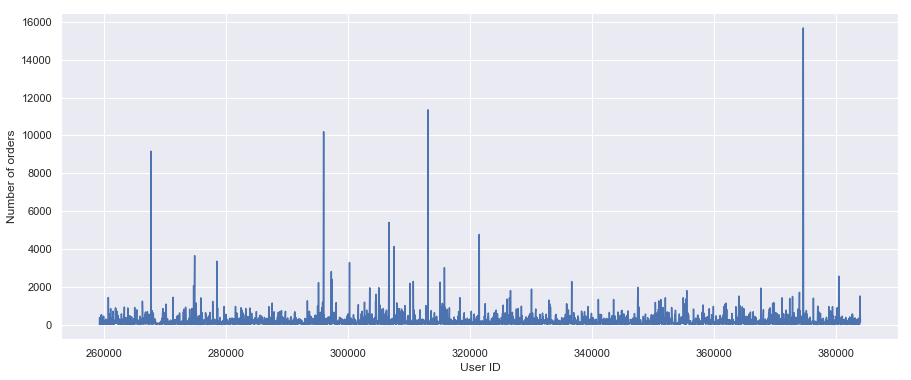

In [118]:
orders= data.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.UserId, orders.TransactionId)
plt.xlabel('User ID')
plt.ylabel('Number of orders')
plt.show()

In [119]:
print("Top 5 customers with most orders:")
orders.sort_values(by='TransactionId',ascending=False).head()

Top 5 customers with most orders:


,UserId,Country,TransactionId
4015,374661,United Kingdom,15676
1887,313131,EIRE,11346
1297,296016,United Kingdom,10190
334,267708,United Kingdom,9160
1669,306726,United Kingdom,5394


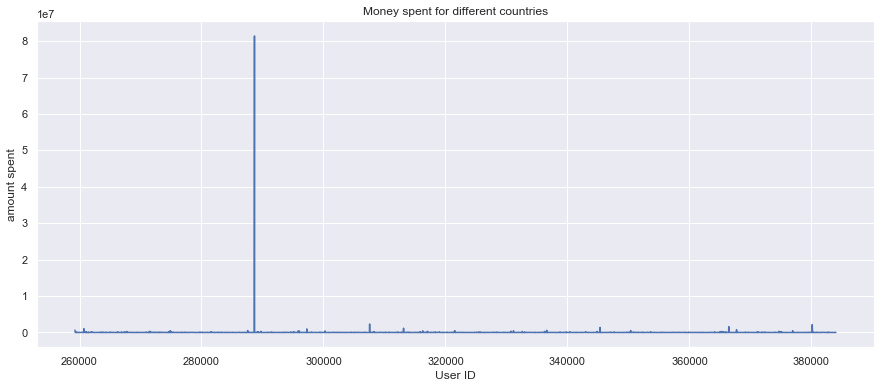

In [122]:
amt_spent=data.groupby(by=['UserId','Country'],as_index=False)['Total_amount'].sum()
plt.subplots(figsize=(15,6))
plt.plot(amt_spent.UserId, amt_spent.Total_amount)
plt.xlabel('User ID')
plt.ylabel('amount spent')
plt.title('Money spent for different countries')
plt.show()

In [124]:
print('Top 5 customers with highest money spent:')
amt_spent.sort_values(by='UserId', ascending=False).head()

Top 5 customers with highest money spent:


,UserId,Country,Total_amount
4341,384027,United Kingdom,15258.24
4340,383943,United Kingdom,17340.72
4339,383922,United Kingdom,1478.40
4338,383901,United Kingdom,669.60
4337,383880,United Kingdom,1497.30


In [125]:
data.head()

,UserId,TransactionId,TransactionTime,year_month,month,day,hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Total_amount,Country
0,278166,6355745,2019-02-02 12:50:00,201902,2,6,12,465549,family album white picture frame,6,11.73,70.38,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,201812,12,3,9,482370,london bus coffee mug,3,3.52,10.56,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,201902,2,5,9,490728,set 12 colour pencils dolly girl,72,0.90,64.80,France
3,380478,6044973,2018-06-22 07:14:00,201806,6,5,7,459186,union jack flag luggage tag,3,1.73,5.19,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,201901,1,5,9,1787247,cut glass t-light holder octagon,12,3.52,42.24,United Kingdom


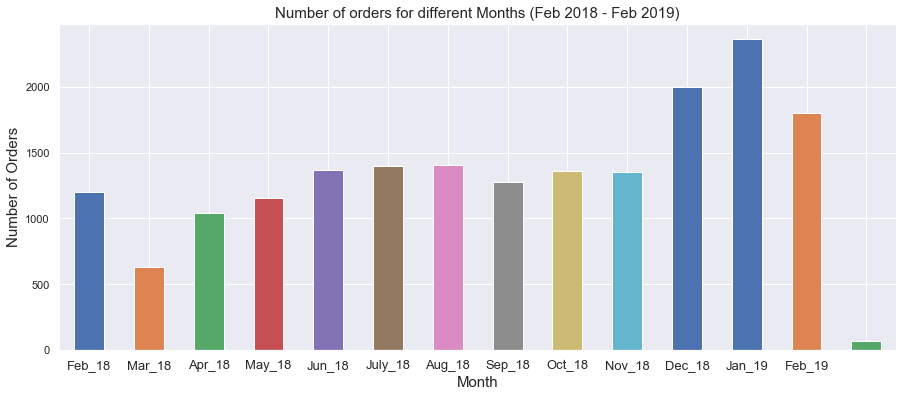

In [127]:
mon=data.groupby('TransactionId')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
mon.set_xlabel('Month',fontsize=15)
mon.set_ylabel('Number of Orders',fontsize=15)
mon.set_title('Number of orders for different Months (Feb 2018 - Feb 2019)',fontsize=15)
mon.set_xticklabels(('Feb_18','Mar_18','Apr_18','May_18','Jun_18','July_18','Aug_18','Sep_18','Oct_18','Nov_18','Dec_18','Jan_19','Feb_19'), rotation='horizontal', fontsize=13)
plt.show()

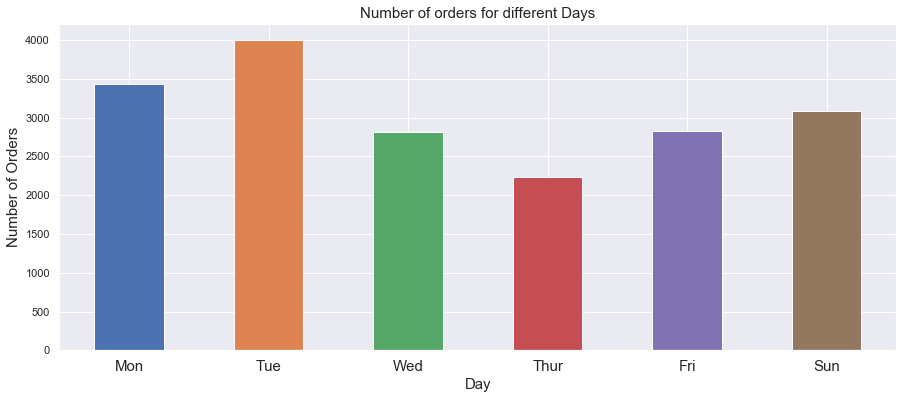

In [131]:
day=data.groupby('TransactionId')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
day.set_xlabel('Day',fontsize=15)
day.set_ylabel('Number of Orders',fontsize=15)
day.set_title('Number of orders for different Days',fontsize=15)
day.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

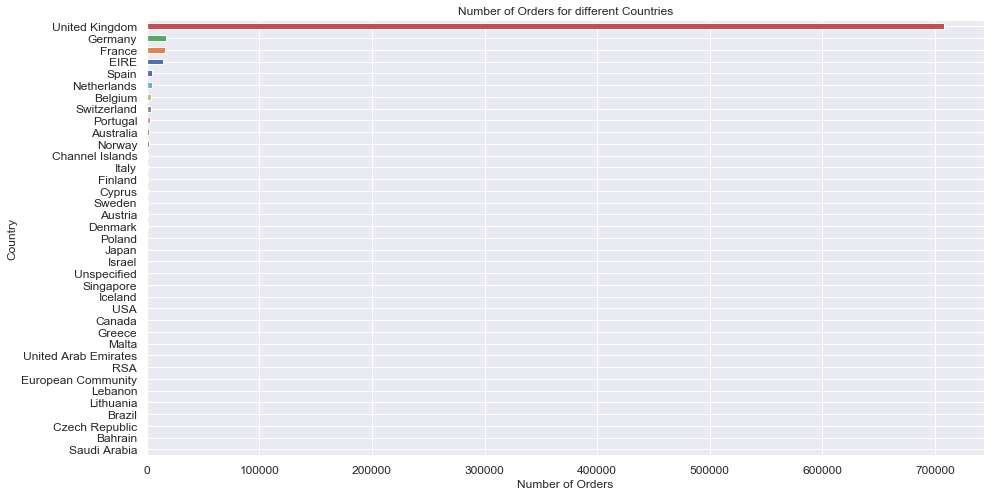

In [133]:
cou=data.groupby('Country')['TransactionId'].count().sort_values()
plt.subplots(figsize=(15,8))
cou.plot('barh',fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

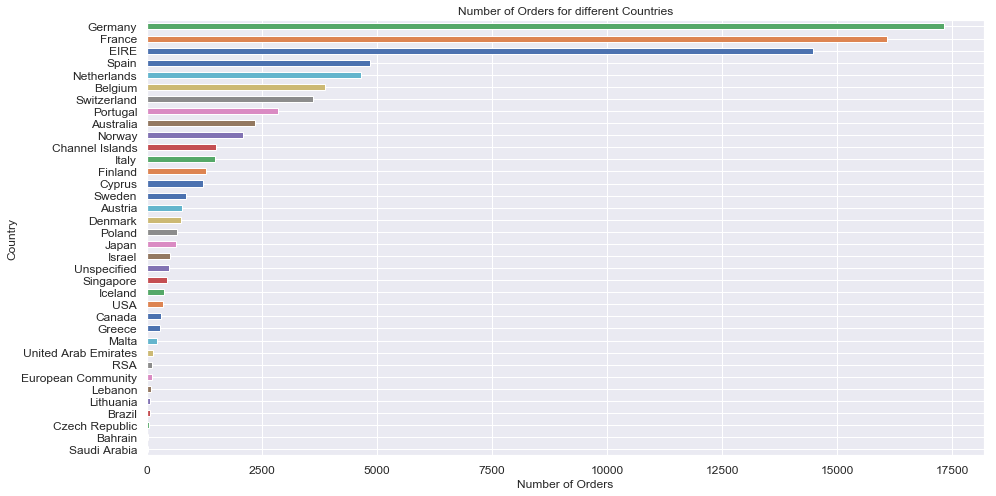

In [134]:
cou=data.groupby('Country')['TransactionId'].count().sort_values()
del cou['United Kingdom']
plt.subplots(figsize=(15,8))
cou.plot('barh',fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

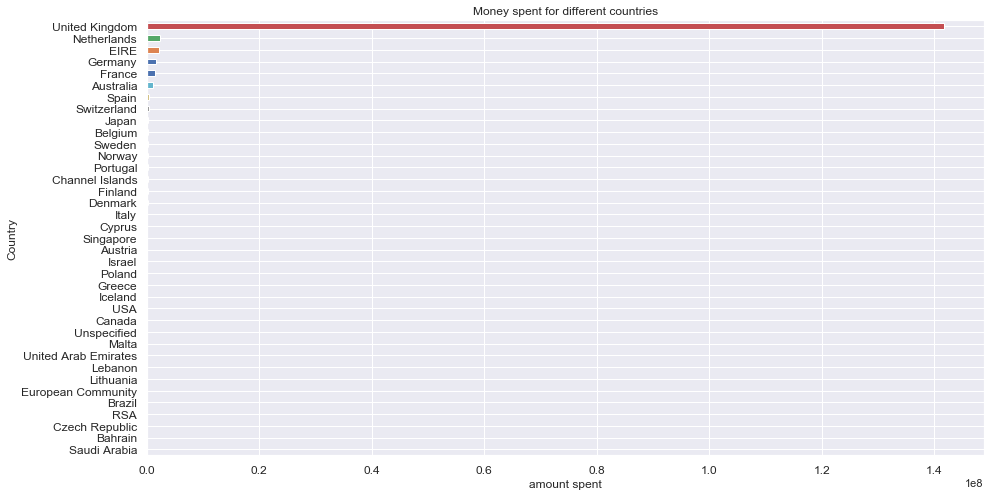

In [136]:
country_amt=data.groupby('Country')['Total_amount'].sum().sort_values()
plt.subplots(figsize=(15,8))
country_amt.plot('barh',fontsize=12)
plt.xlabel('amount spent',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Money spent for different countries',fontsize=12)
plt.show()

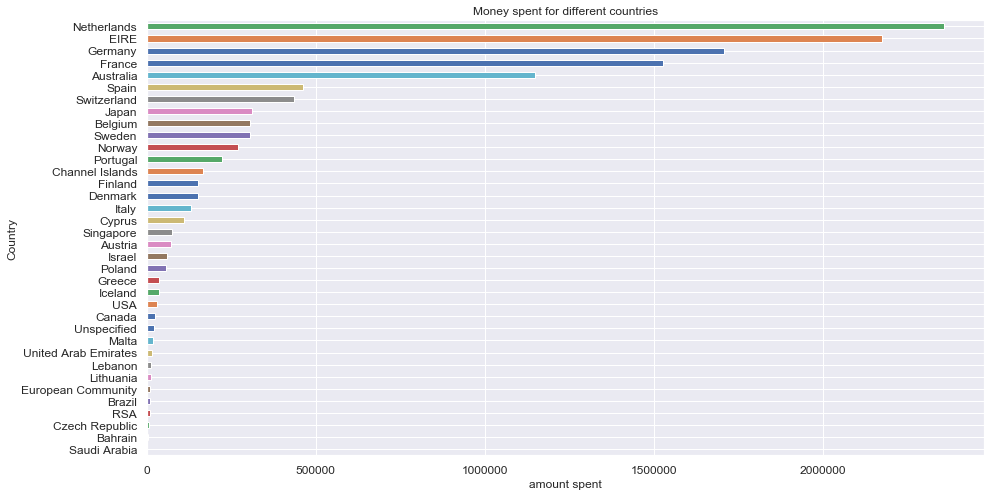

In [138]:
country_amt=data.groupby('Country')['Total_amount'].sum().sort_values()
del country_amt['United Kingdom']
plt.subplots(figsize=(15,8))
country_amt.plot('barh',fontsize=12)
plt.xlabel('amount spent',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Money spent for different countries',fontsize=12)
plt.show()

In [140]:
data.to_csv('processed_file.csv',index=True)